# Initial Thorium Move
- The prior for the 230Th/232ThA0 parameter can be highly complex and multi-modular. As a result a traditional gaussian type proposal may get "stuck". In this case sticking means to not fully and freely explore the whole parameter space to find the gloabel minimum. So we need another approach to help get us passed this.

- In the IBIS model we initial map a 230Th/232ThA0 value through its prior cumulative density function (CDF) and then proposed a step in a flat [0,1] space.

- This approach naturally handles boundaries. We perform a % 1.0 wraparound in u-space. This "stitches" together the two ends of the unit interal so that every proposal stays valid, and the chain can traverse smoothly across the parameter space.


- This move structure provides better mixing for skewed or complex priors.

- This proposal is symmetric in u, the Jacobian therefore naturally cancels out and there is no need to include it.

- This is not needed for the measured ratios as we expect this to be normally distribution and in such a scenario a gaussian proposal will be symmetric here. 

- The plot below shows the modulo wrap-aroud for a unit circle to visualise the "geometry" of the 230Th/232ThA0 move. 

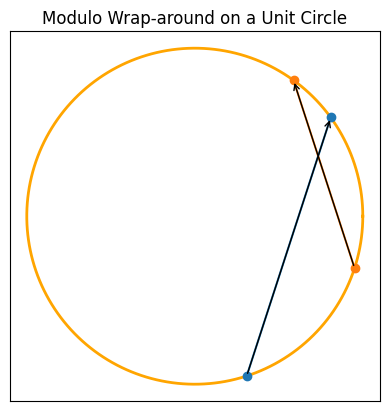

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example Steps 
# u_cur is the current position
# and u_prop it the proposal value. 
u_cur = np.array([0.8, 0.95])
steps = np.array([0.3, 0.2])
u_prop = (u_cur + steps) % 1.0

# Convert Quantiles to angles
angles_cur = u_cur * 2 * np.pi
angles_prop = u_prop * 2 * np.pi

# Draw Circle 
theta = np.linspace(0, 2 * np.pi, 200)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

plt.figure()
ax = plt.gca()
ax.plot(x_circle, y_circle, color='orange', linewidth=2)


for a_cur, a_prop in zip(angles_cur, angles_prop):
    x0, y0 = np.cos(a_cur), np.sin(a_cur)
    x1, y1 = np.cos(a_prop), np.sin(a_prop)
    ax.plot([x0, x1], [y0, y1], marker='o')
    ax.annotate('', xy=(x1, y1), xytext=(x0, y0), arrowprops=dict(arrowstyle='->'))

ax.set_aspect('equal', 'box')
ax.set_xticks([])
ax.set_yticks([])
plt.title('Modulo Wrap-around on a Unit Circle')
plt.show()

